In [1]:
#importing libraries
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
import sys
import numpy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [2]:
#adding label with the three categories
import pandas as pd
import numpy as np

df = pd.read_csv('Datafiniti_Hotel_Reviewscomplete.csv')

min = 0
max = 5
col = 'reviews.rating'
conditions = [(df[col] >= min) & (df[col] < min+3),
              (df[col] == min + 3) & (df[col] == min+3),
              (df[col] > min+3)  & (df[col] <= max)]
choices = ["Bad","Neutral","Good"]
df["Evaluation"] = np.select(conditions, choices, default=np.nan)

df.to_csv('Datafiniti_Hotel_Reviewscomplete.csv', index=False)

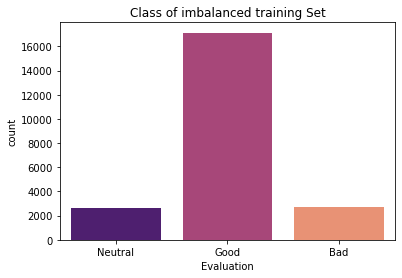

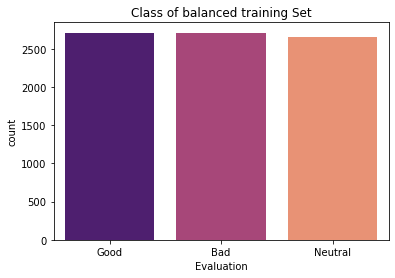

In [3]:
#SPLIT & BALANCE
#split train and test and do the balance on the train
#traib 75% test 25%
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns
from csv import reader
import matplotlib.pyplot as plt


#split the data into train and test set
#reading dataset
readCsv = pd.read_csv("Datafiniti_Hotel_Reviewscomplete.csv")


train,test = train_test_split(readCsv, test_size=0.25, random_state=1)
#save the data
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

#PLOT 1
plt.title("Class of imbalanced training Set")
# read a tips.csv file from seaborn library
df = pd.read_csv("train.csv")
# count plot along x axis
sns.countplot(x="Evaluation", data = df , palette="magma")
# Show the plot
plt.show()


#do rebalncing training set
class_0 = train[train['Evaluation'] == "Good"]
class_1 = train[train['Evaluation'] == "Bad"]
class_2 = train[train['Evaluation'] == "Neutral"]
class_count_0, class_count_1, class_count_2 = train['Evaluation'].value_counts()
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1, class_2], axis=0)


test_under.to_csv("BalancedTrain.csv", index=None)
BalancedTrain = pd.read_csv('BalancedTrain.csv')

#PLOT2
plt.title("Class of balanced training Set")
# read a tips.csv file from seaborn library
df = pd.read_csv("BalancedTrain.csv")
# count plot along x axis
sns.countplot(x="Evaluation", data = df , palette="magma")
# Show the plot
plt.show()

In [4]:
#TEXT RETRIVE & ELABORATION TEST & TRAIN
#TEXT RETRIEVE and CLEANING
#1. lower case
#2. remove punctuation
#3. remove mention @...
#4 remove link http:....
#5. remove emoji

#TEXT ELABORATION
#1. tokenization
#2. stop word filtering
#3. lematizzation




#reading the data
test_csv = pd.read_csv('test.csv') 
train_csv = pd.read_csv('BalancedTrain.csv')


train_X_non = train_csv['reviews.text'] #without preprocessing
train_y = train_csv['Evaluation']   #only evaluation
test_X_non = test_csv['reviews.text'] 
test_y = test_csv['Evaluation']  
train_X_cleaned=[]
test_X_cleaned=[]
train_X=[] #with preprocessing
test_X=[]


emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#Cleaning Train
import re
for i in range(0, len(train_X_non)):
    review = train_X_non[i]
    review = str(review).lower()
    review = review.translate(str.maketrans('', '', string.punctuation)) #remove puntuaction
    review = re.sub('@[^\s]+','',review) #remove mention
    review = re.sub('http[^\s]+','',review) #remove link
    review=emoji_pattern.sub(r'', review) # remove emoji
    train_X_cleaned.append(review)

#Cleaning Test
import re
for i in range(0, len(test_X_non)):
    review = test_X_non[i]
    review = str(review).lower()
    review = review.translate(str.maketrans('', '', string.punctuation))
    review = re.sub('@[^\s]+','',review) #remove mention
    review = re.sub('http[^\s]+','',review) #remove link
    review=emoji_pattern.sub(r'', review) # remove emoji
    test_X_cleaned.append(review)

lemmatizer = WordNetLemmatizer()
#Preprocessing Train
stop_words=set(stopwords.words("english"))
ps = PorterStemmer()
filtered_sent=[]
for i in range(0, len(train_X_cleaned)):
    review = train_X_cleaned[i]
    review=word_tokenize(review) #tokenization
    for w in review:             #stop word filtering
        if w not in stop_words:
            filtered_sent.append(w)
    review=filtered_sent
    filtered_sent=[]
    for w in review:            #stemming
        filtered_sent.append(lemmatizer.lemmatize(w))
    review=filtered_sent
    filtered_sent=[]
    review = ' '.join(review)
    train_X.append(review)
    
#Preprocessing Test
stop_words=set(stopwords.words("english"))
ps = PorterStemmer()
filtered_sent=[]
for i in range(0, len(test_X_cleaned)):
    review = test_X_cleaned[i]
    review=word_tokenize(review) #tokenization
    for w in review:             #stop word filtering
        if w not in stop_words:
            filtered_sent.append(w)
    review=filtered_sent
    filtered_sent=[]
    for w in review:            #stemming
        filtered_sent.append(lemmatizer.lemmatize(w))
    review=filtered_sent
    filtered_sent=[]
    review = ' '.join(review) #CON QUESTA UNISCO
    test_X.append(review)
    

In [5]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer( max_features=5000,lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
X_train_counts=count_vect.fit_transform(raw_documents=train_X)

tfidf_transformer=TfidfTransformer()
X_train_tf=tfidf_transformer.fit_transform(X_train_counts)

X_test_counts=count_vect.fit_transform(raw_documents=test_X)
X_test_tf=tfidf_transformer.fit_transform(X_test_counts)


feature_names = count_vect.get_feature_names()
dense = X_train_tf.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
print(df2)

       10  100  1000  10000  100am  101  1012  1015  1030  10am  ...  yummy  \
0     0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   
1     0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   
2     0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   
3     0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   
4     0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   
...   ...  ...   ...    ...    ...  ...   ...   ...   ...   ...  ...    ...   
8070  0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   
8071  0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   
8072  0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   
8073  0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   
8074  0.0  0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0  ...    0.0   

      zaza  zephyr  zero  zone  zoo   åß   åæ   åó 

In [6]:
#serve a trasformare le label in numeri
import copy
train_y_clf = copy.deepcopy(train_y)
test_y_clf = copy.deepcopy(test_y)

df_train_y=train_y
for i  in range(0, len(df_train_y)):
    if df_train_y[i]=="Good":
        df_train_y[i]=2
    elif df_train_y[i]=="Neutral":
        df_train_y[i]=1
    else :
        df_train_y[i]=-1

df_test_y = test_y
for i  in range(0, len(df_test_y)):
    if df_test_y[i]=="Good":
        df_test_y[i]=2
    elif df_test_y[i]=="Neutral":
        df_test_y[i]=1
    else :
        df_test_y[i]=-1
        
df_train_y.to_csv('LabelToNumber-train.csv', index=None)
df_test_y.to_csv('LabelToNumber-test.csv')

df_train_y = pd.read_csv('LabelToNumber-train.csv')
df_test_y = pd.read_csv('LabelToNumber-test.csv')

C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/1022133320.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_y[i]=2
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/1022133320.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_y[i]=-1
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/1022133320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_y[i]=1
C:\Users\Domenico\AppData\Local\Temp/ipyker

In [ ]:
#KNN 
knn = KNeighborsClassifier(n_neighbors=200,weights='uniform',algorithm='auto', n_jobs=-1)
train_sizes, train_scores, valid_scores = learning_curve(knn, X_train_tf, np.ravel(df_train_y.astype(int)),cv=10)
y_pred = cross_val_predict(knn,X_train_tf,  np.ravel(df_train_y.astype(int)), cv=10)
results = cross_validate(knn,X_train_tf, np.ravel(df_train_y.astype(int)),cv=10,scoring='neg_mean_squared_error')

accuracy = cross_val_score(knn,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='accuracy') 
precision = cross_val_score(knn,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='precision_macro')
recall = cross_val_score(knn,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='recall_macro') 
f1 = cross_val_score(knn,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='f1_macro') 


print("\nAccuracy: ", accuracy) 
acc_round = numpy.round(accuracy.mean(),2)
print("\nAccuracy mean: ", acc_round)
print("\nPrecision: ", precision)
prec_round = numpy.round(precision.mean(),2)
print("\nPrecision mean: ", prec_round)
print("\nRecall: ", recall)
rec_round = numpy.round(recall.mean(),2)
print("\nRecall mean: ", rec_round)
print("\nF1: ", f1)
f1_round = numpy.round(f1.mean(),2)
print("\nF1 mean: ", f1_round)


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', valid_scores)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
print('\n\n\n')



#print (resultstot)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a KNN model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.25)
plt.show()

In [ ]:
#MULTINOMIAL DB
naive_bayes_classifier = MultinomialNB(alpha=0.5)
train_sizes, train_scores, valid_scores = learning_curve(naive_bayes_classifier, X_train_tf, np.ravel(df_train_y.astype(int)),cv=10)
y_pred = cross_val_predict(naive_bayes_classifier,X_train_tf,  np.ravel(df_train_y.astype(int)), cv=10)
results = cross_validate(naive_bayes_classifier,X_train_tf, np.ravel(df_train_y.astype(int)),cv=10,scoring='neg_mean_squared_error')

accuracy = cross_val_score(naive_bayes_classifier,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='accuracy') 
precision = cross_val_score(naive_bayes_classifier,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='precision_macro')
recall = cross_val_score(naive_bayes_classifier,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='recall_macro') 
f1 = cross_val_score(naive_bayes_classifier,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='f1_macro') 

print("\nAccuracy: ", accuracy) 
acc_round = numpy.round(accuracy.mean(),2)
print("\nAccuracy mean: ", acc_round)
print("\nPrecision: ", precision)
prec_round = numpy.round(precision.mean(),2)
print("\nPrecision mean: ", prec_round)
print("\nRecall: ", recall)
rec_round = numpy.round(recall.mean(),2)
print("\nRecall mean: ", rec_round)
print("\nF1: ", f1)
f1_round = numpy.round(f1.mean(),2)
print("\nF1 mean: ", f1_round)


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', valid_scores)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
print('\n\n\n')
#print (resultstot)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Multinomial NB model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.25)
plt.show()

In [ ]:
# BAGGING
bgclassifier = BaggingClassifier(base_estimator=None, n_estimators=30, bootstrap_features=False, oob_score=False, n_jobs=-1)

accuracy = cross_val_score(bgclassifier,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='accuracy') 
precision = cross_val_score(bgclassifier,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='precision_macro')
recall = cross_val_score(bgclassifier,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='recall_macro') 
f1 = cross_val_score(bgclassifier,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='f1_macro') 

print("\nAccuracy: ", accuracy) 
acc_round = numpy.round(accuracy.mean(),2)
print("\nAccuracy mean: ", acc_round)
print("\nPrecision: ", precision)
prec_round = numpy.round(precision.mean(),2)
print("\nPrecision mean: ", prec_round)
print("\nRecall: ", recall)
rec_round = numpy.round(recall.mean(),2)
print("\nRecall mean: ", rec_round)
print("\nF1: ", f1)
f1_round = numpy.round(f1.mean(),2)
print("\nF1 mean: ", f1_round)


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', valid_scores)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
print('\n\n\n')
#print (resultstot)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a BAGGING model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.25)
plt.show()

In [ ]:
#DECISION TREE
decison_gini = DecisionTreeClassifier(max_depth=12,criterion='entropy')
train_sizes, train_scores, valid_scores = learning_curve(decison_gini, X_train_tf, np.ravel(df_train_y.astype(int)),cv=10)
y_pred = cross_val_predict(decison_gini,X_train_tf,  np.ravel(df_train_y.astype(int)), cv=10)
results = cross_validate(decison_gini,X_train_tf, np.ravel(df_train_y.astype(int)),cv=10,scoring='neg_mean_squared_error')

accuracy = cross_val_score(decison_gini,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='accuracy') 
precision = cross_val_score(decison_gini,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='precision_macro')
recall = cross_val_score(decison_gini,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='recall_macro') 
f1 = cross_val_score(decison_gini,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='f1_macro') 

print("\nAccuracy: ", accuracy) 
acc_round = numpy.round(accuracy.mean(),2)
print("\nAccuracy mean: ", acc_round)
print("\nPrecision: ", precision)
prec_round = numpy.round(precision.mean(),2)
print("\nPrecision mean: ", prec_round)
print("\nRecall: ", recall)
rec_round = numpy.round(recall.mean(),2)
print("\nRecall mean: ", rec_round)
print("\nF1: ", f1)
f1_round = numpy.round(f1.mean(),2)
print("\nF1 mean: ", f1_round)


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', valid_scores)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
print('\n\n\n')
#print (resultstot)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a DECISION TREE model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.25)
plt.show()

In [ ]:
#ADA BOOST
ada = AdaBoostClassifier(n_estimators=150,learning_rate=1)
train_sizes, train_scores, valid_scores = learning_curve(ada, X_train_tf, np.ravel(df_train_y.astype(int)),cv=10)
y_pred = cross_val_predict(ada,X_train_tf,  np.ravel(df_train_y.astype(int)), cv=10)
results = cross_validate(ada,X_train_tf, np.ravel(df_train_y.astype(int)),cv=10,scoring='neg_mean_squared_error')

accuracy = cross_val_score(ada,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='accuracy') 
precision = cross_val_score(ada,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='precision_macro')
recall = cross_val_score(ada,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='recall_macro') 
f1 = cross_val_score(ada,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='f1_macro') 

print("\nAccuracy: ", accuracy) 
acc_round = numpy.round(accuracy.mean(),2)
print("\nAccuracy mean: ", acc_round)
print("\nPrecision: ", precision)
prec_round = numpy.round(precision.mean(),2)
print("\nPrecision mean: ", prec_round)
print("\nRecall: ", recall)
rec_round = numpy.round(recall.mean(),2)
print("\nRecall mean: ", rec_round)
print("\nF1: ", f1)
f1_round = numpy.round(f1.mean(),2)
print("\nF1 mean: ", f1_round)


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', valid_scores)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
print('\n\n\n')
#print (resultstot)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a ADA BOOST model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.25)
plt.show()

In [ ]:
#SVM
clf = svm.SVC(kernel='poly' ,degree=3,cache_size=500)
train_sizes, train_scores, valid_scores = learning_curve(clf, X_train_tf, np.ravel(df_train_y.astype(int)),cv=10)
y_pred = cross_val_predict(clf,X_train_tf,  np.ravel(df_train_y.astype(int)), cv=10)
results = cross_validate(clf,X_train_tf, np.ravel(df_train_y.astype(int)),cv=10,scoring='neg_mean_squared_error')

accuracy = cross_val_score(clf,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='accuracy') 
precision = cross_val_score(clf,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='precision_macro')
recall = cross_val_score(clf,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='recall_macro') 
f1 = cross_val_score(clf,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='f1_macro') 

print("\nAccuracy: ", accuracy) 
acc_round = numpy.round(accuracy.mean(),2)
print("\nAccuracy mean: ", acc_round)
print("\nPrecision: ", precision)
prec_round = numpy.round(precision.mean(),2)
print("\nPrecision mean: ", prec_round)
print("\nRecall: ", recall)
rec_round = numpy.round(recall.mean(),2)
print("\nRecall mean: ", rec_round)
print("\nF1: ", f1)
f1_round = numpy.round(f1.mean(),2)
print("\nF1 mean: ", f1_round)


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', valid_scores)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
print('\n\n\n')
#print (resultstot)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.25)
plt.show()

In [ ]:
#RANDOM FOREST
forest = RandomForestClassifier(n_estimators=60,max_depth=8, criterion='gini',max_features='auto',bootstrap=False, n_jobs=-1)
train_sizes, train_scores, valid_scores = learning_curve(forest, X_train_tf, np.ravel(df_train_y.astype(int)),cv=10)
y_pred = cross_val_predict(forest,X_train_tf,  np.ravel(df_train_y.astype(int)), cv=10)
results = cross_validate(forest,X_train_tf, np.ravel(df_train_y.astype(int)),cv=10,scoring='neg_mean_squared_error')

accuracy = cross_val_score(forest,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='accuracy') 
precision = cross_val_score(forest,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='precision_macro')
recall = cross_val_score(forest,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='recall_macro') 
f1 = cross_val_score(forest,X_train_tf,np.ravel(df_train_y.astype(int)), cv=10, scoring='f1_macro') 


print("\nAccuracy: ", accuracy) 
acc_round = numpy.round(accuracy.mean(),2)
print("\nAccuracy mean: ", acc_round)
print("\nPrecision: ", precision)
prec_round = numpy.round(precision.mean(),2)
print("\nPrecision mean: ", prec_round)
print("\nRecall: ", recall)
rec_round = numpy.round(recall.mean(),2)
print("\nRecall mean: ", rec_round)
print("\nF1: ", f1)
f1_round = numpy.round(f1.mean(),2)
print("\nF1 mean: ", f1_round)


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', valid_scores)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
print('\n\n\n')
#print (resultstot)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a RANDOM FOREST model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.25)
plt.show()

In [ ]:
#T TEST FOR THE TWO BEST CLASSIFIER
from mlxtend.evaluate import paired_ttest_kfold_cv

t, p = paired_ttest_kfold_cv(estimator1=clf,
                             estimator2=bgclassifier,
                             X=X_train_tf,
                             y=np.ravel(df_train_y.astype(int)), 
                             random_seed=1)

print('p value: %.6f' % p)

In [ ]:
#PLOT THE DIFFERENCE BETWEEN N-GRAM FOR THE BEST CLASSIFICATOR 
i=1
acc = 'n-grams = '
df = pd.DataFrame()
while i<=5:
    #TF-IDF
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.feature_extraction.text import CountVectorizer
    tf_idf = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,i))
    #applying tf idf to training data
    X_train_tf = tf_idf.fit_transform(train_X)   #perche fit e trasform sul train e non sul test
    #applying tf idf to training data
    X_train_tf = tf_idf.transform(train_X)
    #transforming test data into tf-idf matrix
    X_test_tf = tf_idf.transform(test_X)
    
    names =["Bagging + TFIDF"]
    bgclassifier = BaggingClassifier(base_estimator=None, n_estimators=30, bootstrap_features=False, oob_score=False, n_jobs=-1)

    classifiers = [
        bgclassifier
    ]
    #iterate on classifiers
    scores=[]
    for name, clfs in zip(names,classifiers):
        clfs.fit(X_train_tf, train_y_clf)
        score= clfs.score(X_test_tf,test_y_clf)
        scores.append(score)


   
    df['Classifier_Name'] = names
    newColumn=acc +str(i)
    df[newColumn] = scores
    i=i+1


    #sns.set(style="whitegrid")
    #ax = sns.barplot(x="Accuracy score", y="Classifier_Name", data=df)
    #plt.show()

#print(df)
sns.color_palette("mako")
dfm = df.melt('Classifier_Name', var_name='cols', value_name='vals')
#print(dfm)
g = sns.catplot(x="cols", y="vals", hue='Classifier_Name', data=dfm, kind='point' , palette=sns.color_palette(['green', 'blue','red','yellow','purple','black']))
g.fig.set_size_inches(15,5)
plt.show()


In [7]:
#optimized TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
tf_idf = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,2))
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(train_X)  #perche fit e trasform sul train e non sul test
#applying tf idf to training data
X_train_tf = tf_idf.transform(train_X)

#transforming test data into tf-idf matrix
X_test_tf = tf_idf.transform(test_X)

feature_names = tf_idf.get_feature_names()
dense = X_train_tf.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)

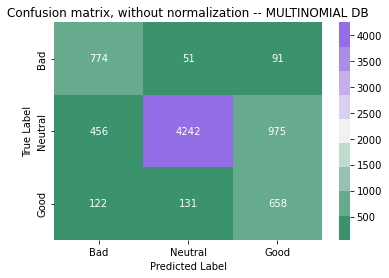


 Time Processing: 
 48.03125

 Zero-one classification loss: 
 0.24

 True Positive: 
 [ 774 4242  658]

 True Negative: 
 [6006 1645 5523]

 False Positive: 
 [ 578  182 1066]

 False Negative: 
 [ 142 1431  253]

 Sensitivity: 
 [ 1.34 23.18  0.62]

 True Postive Rate: 
 [0.84 0.75 0.72]

 True Negative Rate: 
 [0.91 0.9  0.84]

 False Postive Rate: 
 [0.09 0.1  0.16]

 False Negative Rate: 
 [0.16 0.25 0.28]

 The Classification report:
               precision    recall  f1-score   support

         Bad       0.57      0.84      0.68       916
        Good       0.96      0.75      0.84      5673
     Neutral       0.38      0.72      0.50       911

    accuracy                           0.76      7500
   macro avg       0.64      0.77      0.67      7500
weighted avg       0.84      0.76      0.78      7500

Accuracy: 0.76


In [8]:
#bagging CLASSIFIER
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,zero_one_loss
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from time import process_time
bgclassifier = BaggingClassifier(base_estimator=None, n_estimators=30, bootstrap_features=False, oob_score=False, n_jobs=-1)

bgclassifier.fit(X_train_tf, train_y_clf) #faccio il train con le recensioni + l'evaluation
y_pred = bgclassifier.predict(X_test_tf) #faccio la predizione delle recensioni test 

np.set_printoptions(precision=2)
class_names = ['Bad', 'Neutral','Good']

matrix = metrics.confusion_matrix(test_y_clf, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix,
                cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
                xticklabels=["Bad","Neutral","Good"],
                yticklabels=["Bad","Neutral","Good"],
                annot=True,
                fmt='d')
plt.title("Confusion matrix, without normalization -- MULTINOMIAL DB")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

results = confusion_matrix(test_y_clf, y_pred)
error = zero_one_loss(test_y_clf, y_pred)
lerror = round(error,2)

FP = results.sum(axis=0) - numpy.diag(results)
FN = results.sum(axis=1) - numpy.diag(results)
TP = numpy.diag(results)
TN = results.sum() - (FP + FN + TP)
prec = TP / TP + FP
sens = TP / prec
lsens = numpy.round(sens,2)

TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print('\n Time Processing: \n', process_time())
print('\n Zero-one classification loss: \n', lerror)
print('\n True Positive: \n', TP)
print('\n True Negative: \n', TN)
print('\n False Positive: \n', FP)
print('\n False Negative: \n', FN)
print('\n Sensitivity: \n', lsens)
print('\n True Postive Rate: \n', TPR)
print('\n True Negative Rate: \n', TNR)
print('\n False Postive Rate: \n', FPR)
print('\n False Negative Rate: \n', FNR)

# Specificity or true negative rate
TNR = TN/(TN+FP)

print('\n The Classification report:\n', classification_report(test_y_clf, y_pred, digits=2))
accuracy = accuracy_score(test_y_clf, y_pred)
laccuracy = numpy.round(accuracy,2)
print('Accuracy:', laccuracy)

In [9]:
def graphHotel(textName,hotelNumber):
    filtered_sent=[]
    #SELECT HOTEL TO SHOW (Galleria Park Hotel)

    df = pd.read_csv("test.csv")

    nameHotel=textName
    #creo un dataframe con le informazioni
    dfHotel = df.loc[df['name'] == nameHotel]
    dfapp=dfHotel[["reviews.text","name" ,"reviews.date","Evaluation"]]
    dfapp["class"] = ""
    dfapp["valueC"] = ""
    dfapp["valueR"] = ""

    #processing delle review
    for index, row in dfapp.iterrows():
        review=row["reviews.text"]
        test2=[]
        #cleaning
        review = review.lower()
        review = review.translate(str.maketrans('', '', string.punctuation)) #remove puntuaction
        review = re.sub('@[^\s]+','',review) #remove mention
        review = re.sub('http[^\s]+','',review) #remove link
        review=emoji_pattern.sub(r'', review) # remove emoji

        #processing
        review=word_tokenize(review) #tokenization
        for w in review:             #stop word filtering
            if w not in stop_words:
                filtered_sent.append(w)
        review=filtered_sent
        filtered_sent=[]
        for w in review:            #stemming
            filtered_sent.append(lemmatizer.lemmatize(w))
        review=filtered_sent
        filtered_sent=[]
        review = ' '.join(review)
        test2.append(review)
        X_test_tf = tf_idf.transform(test2)
        #do the prediction
        MNB = bgclassifier.predict(X_test_tf)[0]
        row["class"]=MNB

    #convert format of the date
    import datetime
    new_format = "%Y-%m-%d"
    for index, row in dfapp.iterrows():
        d1 = datetime.datetime.strptime(row["reviews.date"],"%Y-%m-%dT%H:%M:%S.%fZ")
        row["reviews.date"]=d1.strftime(new_format)

    for index, row in dfapp.iterrows():
        if(row["class"]=="Good"):
            row["valueC"]=1
        if(row["class"]=="Neutral"):
            row["valueC"]=0
        if(row["class"]=="Bad"):
            row["valueC"]=-1

    for index, row in dfapp.iterrows():
        if(row["Evaluation"]=="Good"):
            row["valueR"]=1
        if(row["Evaluation"]=="Neutral"):
            row["valueR"]=0
        if(row["Evaluation"]=="Bad"):
            row["valueR"]=-1 

    YearwiseR=dfapp.groupby('reviews.date', as_index=False)['valueR'].sum()
    YearwiseC =dfapp.groupby('reviews.date', as_index=False)['valueC'].sum()

    ax = YearwiseR.plot(linewidth=5, label="Review retrieved", color="blue")
    YearwiseC.plot (linewidth=3, linestyle='dashed', ax=ax, label="Review classified", color="orange")
    plt.legend(loc="upper left")
    plt.title("Combined Statistics on Reviews of " + nameHotel)
    plt.xlabel("# of Reviews")
    plt.ylabel("Classified as")
    plt.savefig('Hotel1.png')
    plt.show()

    #plot dell'andamento
    Yearwise=dfapp.groupby(by=('reviews.date')).sum()['valueC']
    plt.figure(figsize=(8,6))
    Yearwise.plot(linewidth=5, label="Review retrieved", color="red" , marker="+" , mec="blue" )
    plt.legend(loc="lower right")
    plt.xlabel("Date of the review")
    plt.ylabel("Sum of vote")
    namePng='Hotel'+hotelNumber+'.png'
    plt.savefig(namePng)
    plt.show()



C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["class"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["valueC"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

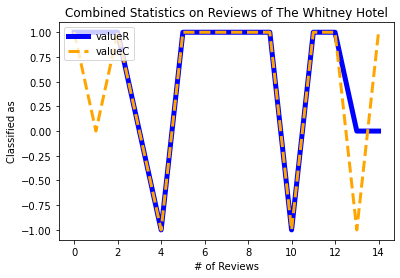

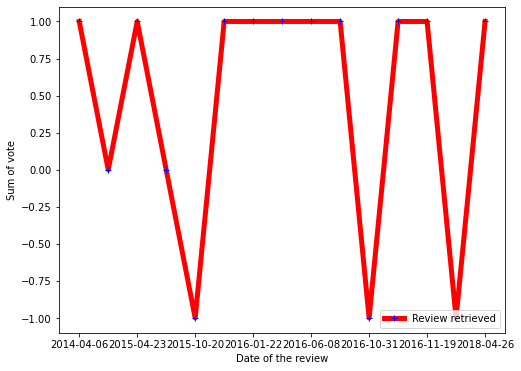

In [10]:
#SELECT HOTEL TO SHOW (Galleria Park Hotel)
nameHotel="The Whitney Hotel"
graphHotel(nameHotel,'1')

C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["class"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["valueC"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

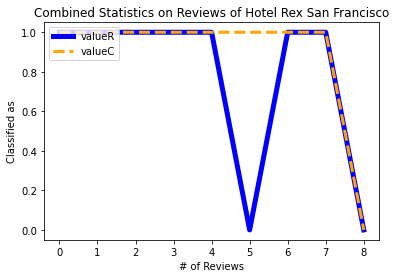

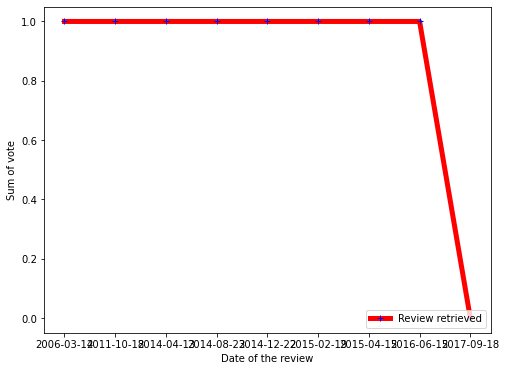

In [11]:
#SELECT HOTEL TO SHOW (Hotel rex)
nameHotel="Hotel Rex San Francisco"
graphHotel(nameHotel,'2')

C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["class"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["valueC"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

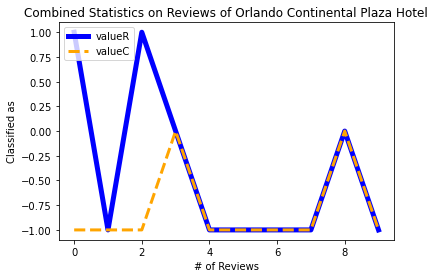

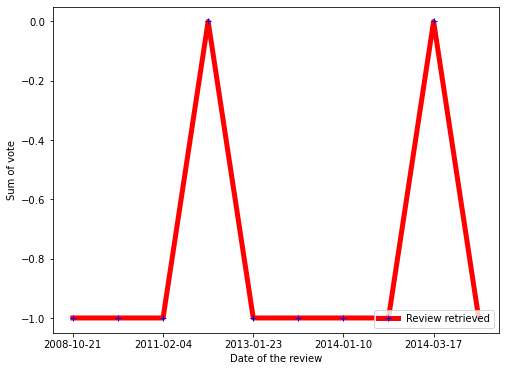

In [12]:
#SELECT HOTEL TO SHOW (Orlando)
nameHotel="Orlando Continental Plaza Hotel"
graphHotel(nameHotel,'3')

C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["class"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["valueC"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

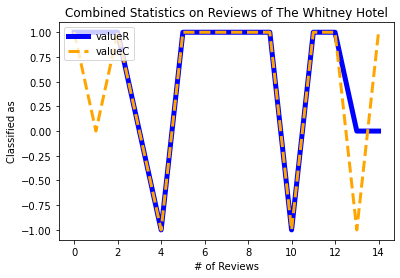

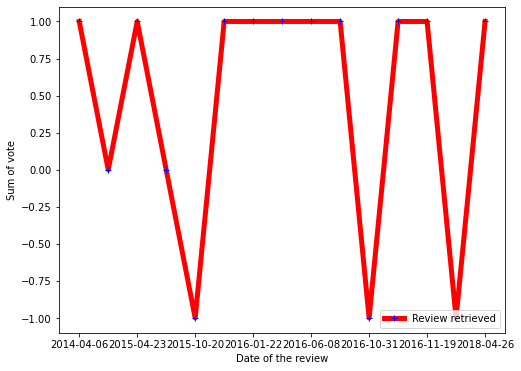

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/3300077085.py", line 160, in GButton_504_command
    self.icon_size.pack(side=LEFT)
AttributeError: 'App' object has no attribute 'icon_size'
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["class"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

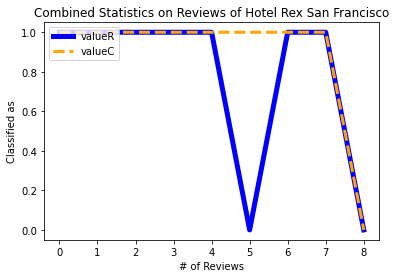

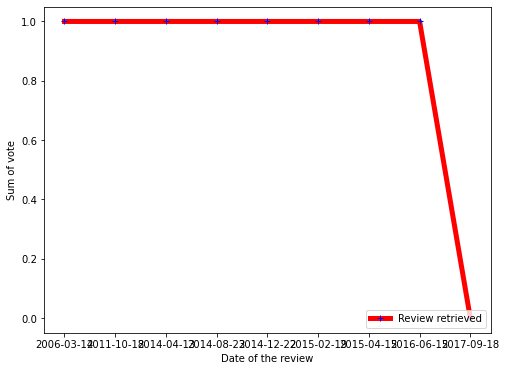

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/3300077085.py", line 171, in GButton_405_command
    self.icon = ImageTk.PhotoImage(Image.open(self.iconPath))
  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py", line 2975, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'data/icons/size.png'
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapp["class"] = ""
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/205323202.py:12: Sett

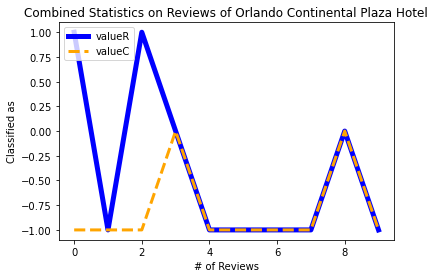

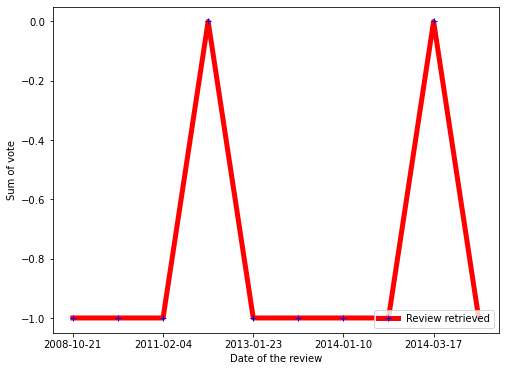

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/3300077085.py", line 188, in GButton_226_command
    self.icon_size.image = self.icon  # <== this is were we anchor the img object
AttributeError: 'App' object has no attribute 'icon'
C:\Users\Domenico\AppData\Local\Temp/ipykernel_9296/3300077085.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[0] = text


In [14]:
import tkinter as tk
from tkinter import *
import tkinter.font as tkFont
from PIL import Image, ImageTk

    
class App:
    def __init__(self, root):
        global  message;
        global review;
        review = StringVar()
        message= StringVar()
        #setting title
        root.title("Hotel App")
        #setting window size
        width=700
        height=650
        screenwidth = root.winfo_screenwidth()
        screenheight = root.winfo_screenheight()
        alignstr = '%dx%d+%d+%d' % (width, height, (screenwidth - width) / 2, (screenheight - height) / 2)
        root.geometry(alignstr)
        #root.configure(background='green')
        root.resizable(width=False, height=False)
                
        imge=PhotoImage(file=r'C:/Users/Domenico/Desktop/PROJECT_Data - Leo/bte.png')
        GButton_372=tk.Button(root)
        #GButton_372["anchor"] = "ne"
        #GButton_372["bg"] = "#fad400"
        #GButton_372["cursor"] = "target"
        #ft = tkFont.Font(family='Times',size=12)
        #GButton_372["font"] = ft
        #GButton_372["fg"] = "#393d49"
        #GButton_372["justify"] = "center"
        #GButton_372["text"] = "Evaluate"
        GButton_372["image"] = imge
        GButton_372.place(x=30,y=110,width=151,height=35)
        GButton_372["command"] = self.GButton_372_command
        GButton_372.image = imge

        
        GLineEdit_741=tk.Entry(root)
        GLineEdit_741["borderwidth"] = "3px"
        ft = tkFont.Font(family='Times',size=12)
        GLineEdit_741["font"] = ft
        GLineEdit_741["fg"] = "#333333"
        GLineEdit_741["justify"] = "center"
        GLineEdit_741["text"] = "please text a review"
        GLineEdit_741["textvariable"] = review
        GLineEdit_741.place(x=30,y=50,width=485,height=30)
        
        
       
        img1=PhotoImage(file=r'C:/Users/Domenico/Desktop/PROJECT_Data - Leo/bt1.png')
        GButton_504=tk.Button(root)
        #GButton_504["bg"] = "#5fb878"
        #ft = tkFont.Font(family='Times',size=12)
        #GButton_504["font"] = ft
        #GButton_504["fg"] = "#000000"
        #GButton_504["justify"] = "center"
        #GButton_504["text"] = "Hyatt House Seattle statistics"
        GButton_504["image"] = img1
        GButton_504.place(x=30,y=180,width=150,height=35)
        GButton_504["command"] = self.GButton_504_command
        GButton_504.image = img1
        
        

        img2=PhotoImage(file=r'C:/Users/Domenico/Desktop/PROJECT_Data - Leo/bt2.png')
        GButton_405=tk.Button(root)
        #GButton_405["bg"] = "#5fb878"
        #ft = tkFont.Font(family='Times',size=12)
        #GButton_405["font"] = ft
        #GButton_405["fg"] = "#000000"
        #GButton_405["justify"] = "center"
        #GButton_405["text"] = "Hotel Cape Charles statistics"
        GButton_405["image"] = img2
        GButton_405.place(x=220,y=180,width=150,height=35)
        GButton_405["command"] = self.GButton_405_command
        GButton_405.image = img2

        
         
        img3=PhotoImage(file=r'C:/Users/Domenico/Desktop/PROJECT_Data - Leo/bt3.png')
        GButton_226=tk.Button(root,image=img3)
        #GButton_226["bg"] = "#5fb878"
        #ft = tkFont.Font(family='Times',size=12)
        #GButton_226["font"] = ft
        #GButton_226["fg"] = "#393d49"
        #GButton_226["justify"] = "center"
        #GButton_226["text"] = "Galleria Park Hotel statistics"
        GButton_226["image"] = img3
        GButton_226.place(x=400,y=180,width=150,height=35)
        GButton_226["command"] = self.GButton_226_command
        GButton_226.image = img3

        GLabel_132=tk.Label(root)
        GLabel_132["bg"] = "#fad400"
        ft = tkFont.Font(family='Times',size=28)
        GLabel_132["font"] = ft
        GLabel_132["fg"] = "#333333"
        GLabel_132["justify"] = "center"
        GLabel_132["text"] = "CLASS"
        GLabel_132["textvariable"] = message
        GLabel_132.place(x=300,y=110,width=200,height=30)
        
        GLabel_646=tk.Label(root)
        ft = tkFont.Font(family='Times',size=10)
        GLabel_646["font"] = ft
        GLabel_646["fg"] = "#333333"
        GLabel_646["justify"] = "center"
        GLabel_646["text"] = ""
        GLabel_646.place(x=30,y=240,width=476,height=220)
        
    def classification(self , text):
        filtered_sent=[]
        from sklearn.metrics import accuracy_score
        test2=[]
        #doing a test prediction
        test[0] = text
        review=test[0]
        #cleaning
        review = str(review).lower()
        review = review.translate(str.maketrans('', '', string.punctuation)) #remove puntuaction
        review = re.sub('@[^\s]+','',review) #remove mention
        review = re.sub('http[^\s]+','',review) #remove link
        review=emoji_pattern.sub(r'', review) # remove emoji

        #processing
        review=word_tokenize(review) #tokenization
        for w in review:             #stop word filtering
            if w not in stop_words:
                filtered_sent.append(w)
        review=filtered_sent
        filtered_sent=[]
        for w in review:            #stemming
            filtered_sent.append(lemmatizer.lemmatize(w))
        review=filtered_sent
        filtered_sent=[]
        review = ' '.join(review)
        test2.append(review)
        X_test_tf = tf_idf.transform(test2)
        MNB = bgclassifier.predict(X_test_tf)[0]
        return MNB

   


    def GButton_504_command(self):
        graphHotel("The Whitney Hotel",'1')
        img=PhotoImage(file=r'C:/Users/Domenico/Desktop/PROJECT_Data - Leo/Hotel1.png')
        Label(root,image=img).place(x=50,y=230,width=576,height=432)
        #status bar
        self.bar = Frame(root, relief=RIDGE, borderwidth=5)
        self.bar.pack(side=TOP)
        #self.iconPath = 'data/icons/size.png'
        #self.icon = ImageTk.PhotoImage(Image.open(self.iconPath))
        #self.icon_size = Label(self.bar)
        #self.icon_size.image = self.icon  # <== this is were we anchor the img object
        #self.icon_size.configure(image=self.icon)
        self.icon_size.pack(side=LEFT)
    

    def GButton_405_command(self):
        graphHotel("Hotel Rex San Francisco",'2')
        img=PhotoImage(file=r'C:/Users/Domenico/Desktop/PROJECT_Data - Leo/Hotel2.png')
        Label(root,image=img).place(x=50,y=230,width=576,height=432)
        #status bar
        self.bar = Frame(root, relief=RIDGE, borderwidth=5)
        self.bar.pack(side=TOP)
        self.iconPath = 'data/icons/size.png'
        self.icon = ImageTk.PhotoImage(Image.open(self.iconPath))
        self.icon_size = Label(self.bar)
        self.icon_size.image = self.icon  # <== this is were we anchor the img object
        self.icon_size.configure(image=self.icon)
        self.icon_size.pack(side=LEFT)


    def GButton_226_command(self):
        graphHotel("Orlando Continental Plaza Hotel",'3')
        img=PhotoImage(file=r'C:/Users/Domenico/Desktop/PROJECT_Data - Leo/Hotel3.png')
        Label(root,image=img).place(x=50,y=230,width=576,height=432)
        #status bar
        #self.bar = Frame(root, relief=RIDGE, borderwidth=5)
        #self.bar.pack(side=TOP)
        #self.iconPath = 'data/icons/size.png'
        #self.icon = ImageTk.PhotoImage(Image.open(self.iconPath))
        #self.icon_size = Label(self.bar)
        self.icon_size.image = self.icon  # <== this is were we anchor the img object
        #self.icon_size.configure(image=self.icon)
        self.icon_size.pack(side=LEFT)
        
    
    
    
    
    
    
    def GButton_372_command(self):
        message.set("")
        #getting form data
        text=review.get()
        classLabel=self.classification(text)
        message.set(classLabel)
        

if __name__ == "__main__":
    root = tk.Tk()
    app = App(root)
    root.mainloop()